In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# RBF Kernel
def rbf_kernel(X, centers, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2)


In [3]:

# RBF Network class
class RBFNetwork:
    def __init__(self, n_centers=10, gamma=1.0):
        self.n_centers = n_centers
        self.gamma = gamma
        self.centers = None
        self.coefficients = None

    def fit(self, X, y):
        np.random.seed(42)
        self.centers = X[np.random.choice(X.shape[0], self.n_centers, replace=False)]
        X_rbf = rbf_kernel(X, self.centers, self.gamma)
        regressor = LinearRegression()
        regressor.fit(X_rbf, y)
        self.coefficients = regressor.coef_.flatten()
        self.intercept = regressor.intercept_

    def predict(self, X):
        X_rbf = rbf_kernel(X, self.centers, self.gamma)
        return np.dot(X_rbf, self.coefficients) + self.intercept


In [4]:

# Example 1: Polynomial + Trigonometric function y = x^3 + sin(x) + 0.5*x^2
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = X**3 + np.sin(X) + 0.5 * X**2

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:

# Train RBF Network
rbf_network = RBFNetwork(n_centers=15, gamma=0.1)
rbf_network.fit(X_scaled, y)



In [6]:
# Make predictions
y_pred = rbf_network.predict(X_scaled)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error for Polynomial + Trig function: {mse}")


Mean Squared Error for Polynomial + Trig function: 6.460594970825949e-09


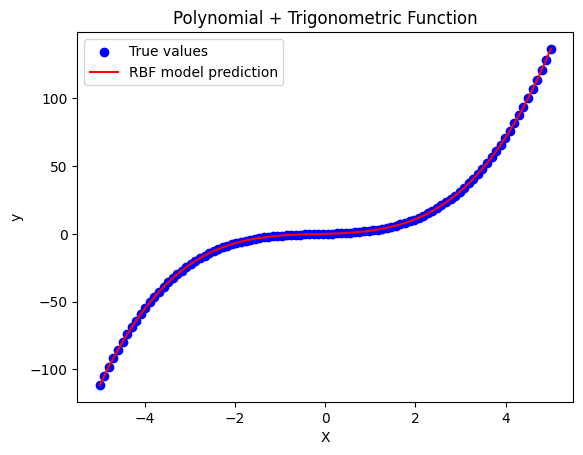

In [7]:

# Visualize the results
plt.scatter(X, y, color='blue', label='True values')
plt.plot(X, y_pred, color='red', label='RBF model prediction')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial + Trigonometric Function")
plt.show()
